In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import globals as gl
import PcmPy as pcm
import pandas as pd
import seaborn as sb
from vis import lineplot_roi_avg
from util import get_trained_and_untrained

experiment = 'EFC_learningfMRI'

plt.style.use('default')

Base directory found: /cifs/diedrichsen/data/Chord_exp/EFC_learningfMRI
Atlas directory found: /home/UWO/memanue5/Documents/GitHub/extension-flexion-chords/extension-flexion-chords/atlases


In [10]:
rois = gl.rois['ROI']
sessions = [3, 9, 23]
H = 'L'
glm= 3

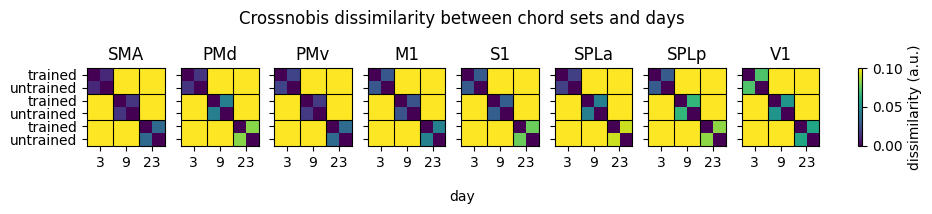

In [11]:
fig, axs = plt.subplots(1, len(rois), sharex=True, sharey=True, figsize=(10, 2))

vmin, vmax = 0, .1

for r, roi in enumerate(rois):
    ax = axs[r]
    G = np.load(os.path.join(gl.baseDir, gl.pcmDir, f'G_obs.trained-untrained.glm{glm}.{H}.{roi}.npy'))
    D = pcm.G_to_dist(G)
    ax.imshow(D.mean(axis=0), vmin=vmin, vmax=vmax)
    ax.set_title(roi)
    ax.set_xticks([.5, 2.5, 4.5])
    ax.set_xticklabels(sessions)
    ax.set_yticks(np.arange(6))
    ax.set_yticklabels(['trained', 'untrained'] * 3)
    ax.axhline(1.5, color='k', lw=.8)
    ax.axhline(3.5, color='k', lw=.8)
    ax.axvline(1.5, color='k', lw=.8)
    ax.axvline(3.5, color='k', lw=.8)

fig.supxlabel('day', fontsize=10)

cax = ax.get_images()[0]
cbar = fig.colorbar(cax, ax=axs, orientation='vertical', fraction=.005)
cbar.set_label('dissimilarity (a.u.)')

fig.suptitle('Crossnobis dissimilarity between chord sets and days')

plt.show()

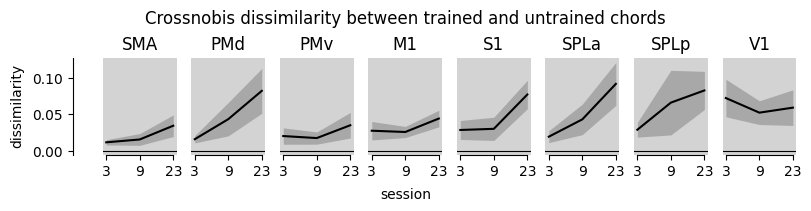

In [13]:
dist = {'dist': [], 'session': [], 'sn': [], 'roi': [], 'Hem': []}
for r, roi in enumerate(rois):
    G = np.load(os.path.join(gl.baseDir, gl.pcmDir, f'G_obs.trained-untrained.glm{glm}.{H}.{roi}.npy'))
    D = pcm.G_to_dist(G)
    for I, i in enumerate(np.arange(1, 6, 2)):
        dist_tmp = D[:, i-1, i]
        dist['dist'].extend(dist_tmp)
        dist['session'].extend(np.repeat(sessions[I], dist_tmp.size))
        dist['sn'].extend(np.arange(dist_tmp.size))
        dist['roi'].extend([roi] * dist_tmp.size)
        dist['Hem'].extend([H] * dist_tmp.size)

df = pd.DataFrame(dist)
fig, axs = plt.subplots(1, len(rois), sharex=True, sharey=True, figsize=(8, 2), constrained_layout=True)
fig, axs = lineplot_roi_avg(fig, axs, df, metric='dist', H='L', rois=rois, color='k')
#axs[0].set_ylim([0, .008])
fig.supxlabel('session', fontsize=10)
fig.supylabel('dissimilarity', fontsize=10)
fig.suptitle('Crossnobis dissimilarity between trained and untrained chords')

plt.show()

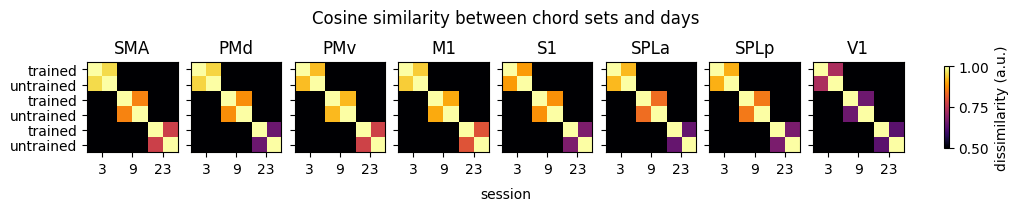

In [15]:
fig, axs = plt.subplots(1, len(rois), sharex=True, sharey=True, figsize=(10, 2), constrained_layout=True)

vmin, vmax = .5, 1

for r, roi in enumerate(rois):
    ax = axs[r]
    G = np.load(os.path.join(gl.baseDir, gl.pcmDir, f'G_obs.trained-untrained.glm{glm}.{H}.{roi}.npy'))
    D = pcm.G_to_cosine(G)
    ax.imshow(D.mean(axis=0), vmin=vmin, vmax=vmax, cmap='inferno')
    ax.set_title(roi)
    ax.set_xticks([.5, 2.5, 4.5])
    ax.set_xticklabels([3, 9, 23])
    ax.set_yticks(np.arange(6))
    ax.set_yticklabels(['trained', 'untrained'] * 3)
    # ax.axhline(1.5, color='k', lw=.8)
    # ax.axhline(3.5, color='k', lw=.8)
    # ax.axvline(1.5, color='k', lw=.8)
    # ax.axvline(3.5, color='k', lw=.8)

fig.supxlabel('session', fontsize=10)

cax = ax.get_images()[0]
cbar = fig.colorbar(cax, ax=axs, orientation='vertical', fraction=.005)
cbar.set_label('dissimilarity (a.u.)')

fig.suptitle('Cosine similarity between chord sets and days')

plt.show()

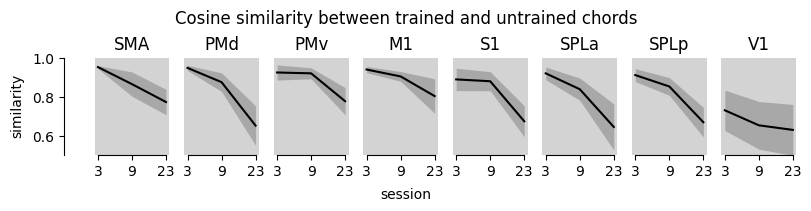

In [18]:
cos = {'cos': [], 'session': [], 'sn': [], 'roi': [], 'Hem': []}
for r, roi in enumerate(rois):
    G = np.load(os.path.join(gl.baseDir, gl.pcmDir, f'G_obs.trained-untrained.glm{glm}.{H}.{roi}.npy'))
    D = pcm.G_to_cosine(G)
    for I, i in enumerate(np.arange(1, 6, 2)):
        cos_tmp = D[:, i-1, i]
        cos['cos'].extend(cos_tmp)
        cos['session'].extend(np.repeat(sessions[I], cos_tmp.size))
        cos['sn'].extend(np.arange(cos_tmp.size))
        cos['roi'].extend([roi] * cos_tmp.size)
        cos['Hem'].extend([H] * cos_tmp.size)

df = pd.DataFrame(cos)
fig, axs = plt.subplots(1, len(rois), sharex=True, sharey=True, figsize=(8, 2), constrained_layout=True)
fig, axs = lineplot_roi_avg(fig, axs, df.copy(), metric='cos', H='L', rois=rois, color='k')
axs[0].set_ylim([.5, 1])
fig.supxlabel('session', fontsize=10)
fig.supylabel('similarity', fontsize=10)
fig.suptitle('Cosine similarity between trained and untrained chords')

plt.show()

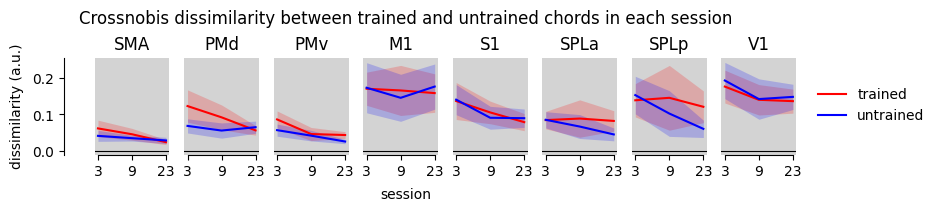

In [19]:
dist = {'dist': [], 'chord': [], 'session': [], 'sn': [], 'roi': [], 'Hem': []}
for sess in sessions:
    for r, roi in enumerate(rois):
        G = np.load(os.path.join(gl.baseDir, gl.pcmDir, f'G_obs.chord.glm{glm}.{sess}.{H}.{roi}.npy'))
        D = pcm.G_to_dist(G ) #/ np.trace(G))
        trained = D[:, :4, :4].mean(axis=(1, 2))
        untrained = D[:, 4:, 4:].mean(axis=(1, 2))
        dist_tmp = np.r_[trained, untrained]
        dist['dist'].extend(dist_tmp)
        dist['chord'].extend(['trained'] * trained.size + ['untrained'] * trained.size)
        dist['session'].extend([sess] * dist_tmp.size)
        dist['sn'].extend(np.arange(dist_tmp.size))
        dist['roi'].extend([roi] * dist_tmp.size)
        dist['Hem'].extend([H] * dist_tmp.size)

df = pd.DataFrame(dist)
fig, axs = plt.subplots(1, len(rois), sharex=True, sharey=True, figsize=(8, 2), constrained_layout=True)
fig, axs = lineplot_roi_avg(fig, axs, df.copy(), metric='dist', H='L', rois=rois, hue='chord', hue_order=['trained', 'untrained'], color=['red', 'blue'], label=['trained', 'untrained'])
#axs[0].set_ylim([0, .015])
fig.supxlabel('session', fontsize=10)
fig.supylabel('dissimilarity (a.u.)', fontsize=10)
fig.suptitle('Crossnobis dissimilarity between trained and untrained chords in each session')

plt.show()

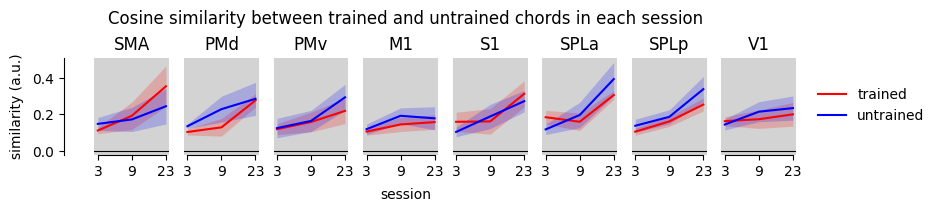

In [32]:
dist = {'cos': [], 'chord': [], 'session': [], 'sn': [], 'roi': [], 'Hem': []}
for sess in sessions:
    for r, roi in enumerate(rois):
        G = np.load(os.path.join(gl.baseDir, gl.pcmDir, f'G_obs.chord.glm{glm}.{sess}.{H}.{roi}.npy'))
        D = pcm.G_to_cosine(G ) #/ np.trace(G))
        trained = D[:, :4, :4].mean(axis=(1, 2))
        untrained = D[:, 4:, 4:].mean(axis=(1, 2))
        dist_tmp = np.r_[trained, untrained]
        dist['cos'].extend(dist_tmp)
        dist['chord'].extend(['trained'] * trained.size + ['untrained'] * trained.size)
        dist['session'].extend([sess] * dist_tmp.size)
        dist['sn'].extend(np.arange(dist_tmp.size))
        dist['roi'].extend([roi] * dist_tmp.size)
        dist['Hem'].extend([H] * dist_tmp.size)

df = pd.DataFrame(dist)
fig, axs = plt.subplots(1, len(rois), sharex=True, sharey=True, figsize=(8, 2), constrained_layout=True)
fig, axs = lineplot_roi_avg(fig, axs, df.copy(), metric='cos', H='L', rois=rois, hue='chord', hue_order=['trained', 'untrained'], color=['red', 'blue'], label=['trained', 'untrained'])
#axs[0].set_ylim([0, .015])
fig.supxlabel('session', fontsize=10)
fig.supylabel('similarity (a.u.)', fontsize=10)
fig.suptitle('Cosine similarity between trained and untrained chords in each session')

plt.show()

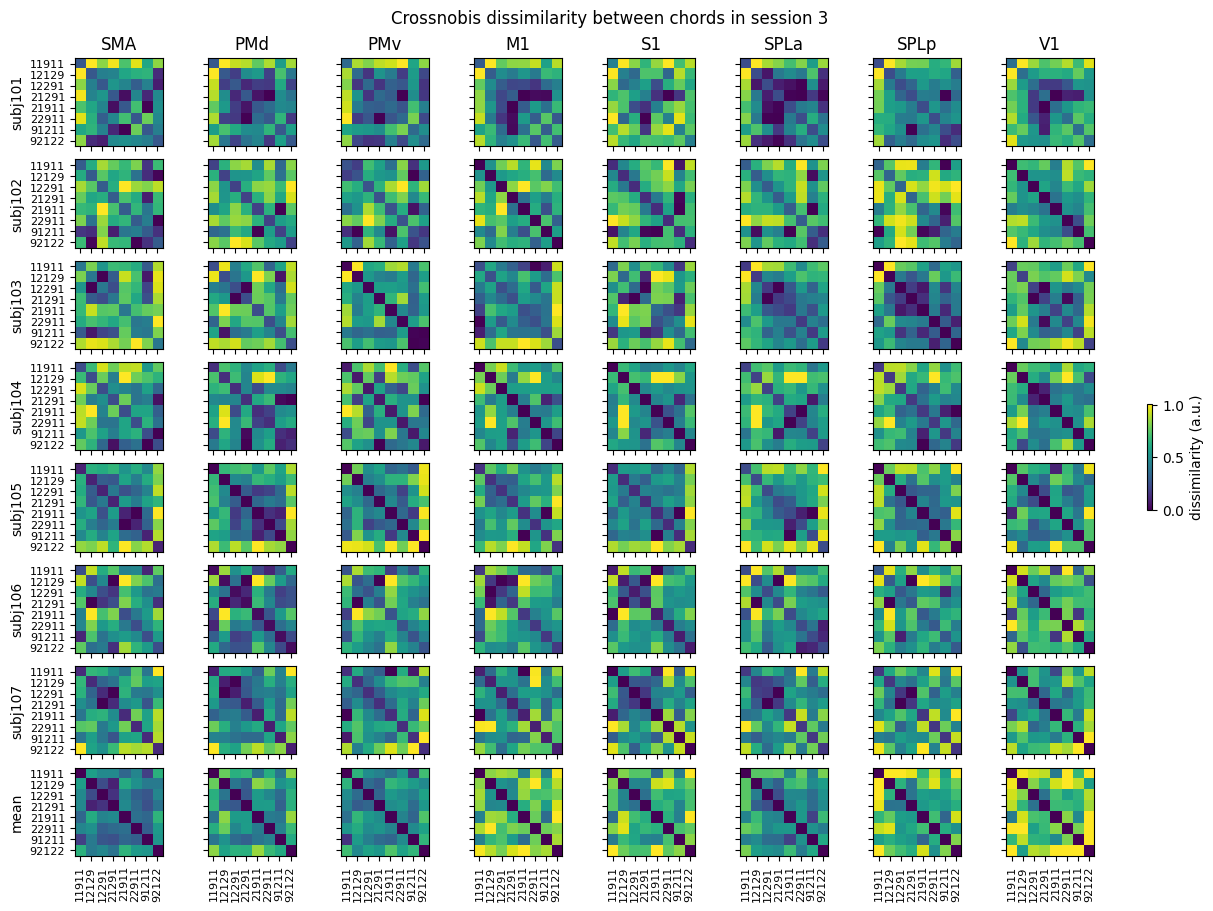

In [31]:
N = 7
participant_id = [101, 102, 103, 104, 105, 106, 107]
chordID = gl.chordID

fig, axs = plt.subplots(N + 1, len(rois), sharex=True, sharey=True, figsize=(12, 9), constrained_layout=True)

sess = 3
vmin, vmax = 0, .6
for r, roi in enumerate(rois):
    G = np.load(os.path.join(gl.baseDir, gl.pcmDir, f'G_obs.chord.glm{glm}.{sess}.{H}.{roi}.npy'))
    D = pcm.G_to_dist(G) # / np.trace(G))
    Dd = np.zeros_like(D)
    for i in range(N):
        trained_untrained = get_trained_and_untrained(participant_id[i])
        order = [trained_untrained.index(ch) for ch in chordID]
        Dd_tmp = D[i].copy()
        Dd_tmp = Dd_tmp[np.ix_(order, order)]
        Dd[i] = Dd_tmp
        ax = axs[i, r]
        Dd_tmp = np.sign(Dd_tmp) * np.sqrt(np.abs(Dd_tmp))
        ax.imshow(Dd_tmp, vmin=vmin, vmax=vmax)
        ax.set_yticks(np.arange(8))
        ax.set_yticklabels(gl.chordID, fontsize=8)
        ax.set_ylabel(f'subj{i + 101}') if r==0 else None
    Dd_m = Dd.mean(axis=0)
    Dd_m = np.sign(Dd_m) * np.sqrt(np.abs(Dd_m))
    axs[-1, r].imshow(Dd_m, vmin=vmin, vmax=vmax)
    axs[-1, r].set_xticks(np.arange(8))
    axs[-1, r].set_xticklabels(gl.chordID, rotation=90, fontsize=8)
    axs[-1, r].set_yticks(np.arange(8))
    axs[-1, r].set_yticklabels(gl.chordID, fontsize=8)
    axs[-1, r].set_ylabel(f'mean') if r==0 else None
    axs[0, r].set_title(roi)

cax = ax.get_images()[0]
cbar = fig.colorbar(cax, ax=axs, orientation='vertical', fraction=.005)
cbar.set_label('dissimilarity (a.u.)')

fig.suptitle(f'Crossnobis dissimilarity between chords in session {sess}')
#fig.subplots_adjust(right=.85)

plt.show()